In [21]:
import fiona
import pandas as pd
import geopandas as gpd
import csv
import seaborn as sns
import numpy as np

In [7]:
from collections import OrderedDict
name_of_file = 'ipbes_ndr_summary_oct_24_md5_da95dbdccf6eaec2b4e1b05437d97b39.gpkg'

layers = fiona.listlayers(name_of_file)
layers

['grid_1_degree',
 'ndr_table',
 'fig1_full',
 'fig2_cNEx',
 'fig3_NExNCP_sp1',
 'fig3_NExNCP_sp3',
 'fig3_NExNCP_sp5',
 'ndr_region_summary_table_pos',
 'ndr_region_summary_table_very_neg',
 'ndr_region_summary_table_neg',
 'fig3_NExNCP',
 'WQR',
 'correct_countries_on_grid_with_fid',
 'ndr_correct_country',
 'country_summary',
 'Final_WQR',
 'Final_WQR_PNpop_norm']

In [47]:
all_datasets = dict()

nexncp = gpd.read_file(name_of_file,layer ='fig3_NExNCP' )

In [38]:
nexncp = nexncp.dropna(subset=['NCP_cur'])

/anaconda3/envs/dataviz/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


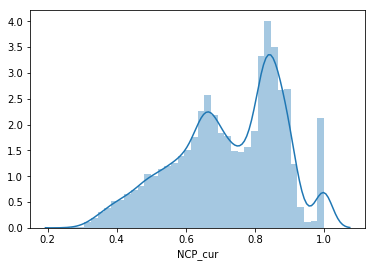

In [39]:
sns.distplot(nexncp['NCP_cur'])

In [45]:
nexncp = gpd.read_file(name_of_file,layer ='fig3_NExNCP' )
nexncp = nexncp.dropna(subset=['NEx_cur'])

/anaconda3/envs/dataviz/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


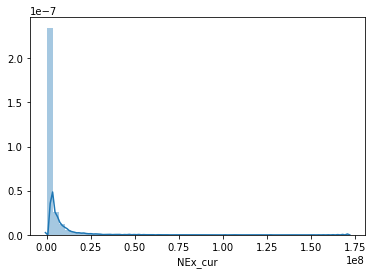

In [46]:
sns.distplot(nexncp['NEx_cur'])

In [51]:
def helper(x):
    if x >1:
        return 1
    else :
        return x

In [52]:
global_wq = nexncp[['fid','NEx_cur','NCP_cur']]
global_wq = global_wq.fillna(0)
global_wq['NEx_cur'] = global_wq['NEx_cur'].apply(lambda x : helper(x))

In [56]:
global_wq

,fid,NEx_cur,NCP_cur
0,2262,0.0,0.0
1,2263,0.0,0.0
2,2264,0.0,0.0
3,2265,0.0,0.0
4,2266,0.0,0.0
5,2267,0.0,0.0
6,2268,0.0,0.0
7,2269,0.0,0.0
8,2270,0.0,0.0
9,2271,0.0,0.0


In [59]:
pd.read_csv(
    "./templates/dataset/fid_lat_lon.csv")[['fid','lat','lng']]

,fid,lat,lng
0,8845,65.5,25.5
1,9204,64.5,24.5
2,9205,64.5,25.5
3,9206,64.5,26.5
4,9207,64.5,27.5
5,9208,64.5,28.5
6,9561,63.5,21.5
7,9562,63.5,22.5
8,9563,63.5,23.5
9,9564,63.5,24.5
